### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import pickle

### Loading Dataset

In [4]:
dataset = pd.read_csv("housing.csv")

In [5]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\r\nFPO AE 09386


### Removing Address Column

In [6]:
dataset.drop(columns="Address",inplace=True) #removing address column

In [7]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


### Replacing Column Names

In [31]:
dataset.columns = ["Area_Income","House_Age","No_of_Rooms","No_Of_Bedrooms","Population","Price"]

In [32]:
dataset.head()

,Area_Income,House_Age,No_of_Rooms,No_Of_Bedrooms,Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


### Missing Value Analysis

In [54]:
dataset.isnull().any()

Area_Income       False
House_Age         False
No_of_Rooms       False
No_Of_Bedrooms    False
Population        False
Price             False
dtype: bool

### Visualizing Price

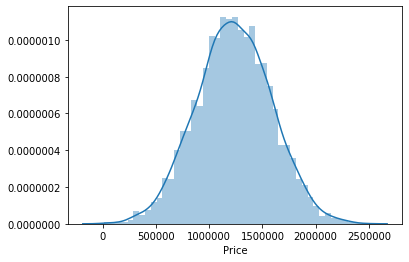

In [56]:
import seaborn as sn

sn.distplot(dataset.Price)

### Correlation Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

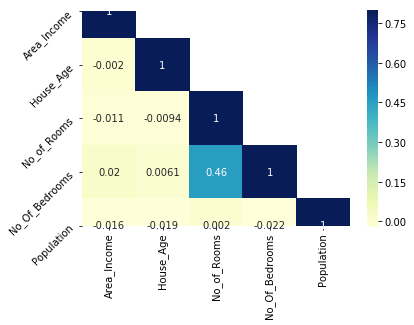

In [83]:
import numpy as np
import matplotlib.pyplot as plt
corrMatt = dataset[features].corr()
fig,ax= plt.subplots()
#fig.set_size_inches(10,20)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap="YlGnBu")
plt.yticks(rotation=45)

### Outliers Detection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002087A2266D8>,
      dtype=object)

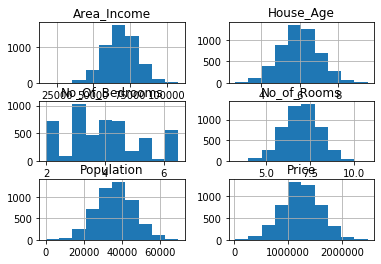

In [86]:
dataset.hist()

### Separating input and ouput


In [39]:
features = ["Area_Income","House_Age","No_of_Rooms","No_Of_Bedrooms","Population"]
target = ["Price"]

x = dataset[features]
y = dataset[target]

### Separating Train and Test 

In [40]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=3)

In [41]:
print(xtrain.shape,xtest.shape)

(3500, 5) (1500, 5)


### Model Building

In [42]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Priting Model Parameters

In [43]:
print("intercept",model.intercept_)
list(zip(features, model.coef_[0]))

intercept [-2636256.95520215]


[('Area_Income', 21.46706217878402),
 ('House_Age', 165516.5873509785),
 ('No_of_Rooms', 122191.41446207077),
 ('No_Of_Bedrooms', 2374.495378136735),
 ('Population', 15.05819384334609)]

### Model R2 Value

In [44]:
model.score(xtrain,ytrain)

0.9188688514638087

### Model Prediction And Metrics (RMSE)

In [45]:
ypred = model.predict(xtest)

error = np.sqrt(mean_squared_error(ytest,ypred))

print("RMSE",error)

RMSE 101375.67744871993


### Saving Model

In [46]:
ModelFile = "LinearRegressionModel.model"
pickle.dump(model,open(ModelFile,"wb"))


### Loading Model And Predicting

In [47]:
LoadedModel = pickle.load(open(ModelFile,"rb"))

testValue = [78876.0599100904,5.565619325540688,6.5554545435154842,4.56,56052.545]
LoadedModel.predict([testValue])

array([[1634080.69462455]])

### Building Model Summary

In [48]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ Area_Income + \
             House_Age + \
             No_of_Rooms + \
             No_Of_Bedrooms + \
             Population', data=dataset).fit()

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:42:04   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Area_Income       21.5780      0.134    160.656      0.000      21.315      21.841
House_Age       1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
No_of_Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
No_Of_Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Population        15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
lm2 = smf.ols(formula='Price ~ Area_Income + \
             House_Age + \
             No_of_Rooms + \
             Population', data=dataset).fit()

In [53]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:42:51   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.638e+06   1.72e+04   -153.726      0.000   -2.67e+06    -2.6e+06
Area_Income    21.5827      0.134    160.743      0.000      21.320      21.846
House_Age    1.657e+05   1443.404    114.769      0.000    1.63e+05    1.68e+05
No_of_Rooms  1.216e+05   1422.608     85.476      0.000    1.19e+05    1.24e+05
Population     15.1961      0.144    105.388      0.000      14.913      15.479
==============================================================================
Omnibus:                        5.310   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.742
Skew:                           0.011   Prob(JB):                       0.0934
Kurtosis:                       2.851   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation

In [140]:
len([a[0] for a in ypred])

1500

In [144]:
len(residuals[0])

1500

C:\Users\vivekanandans\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vivekanandans\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


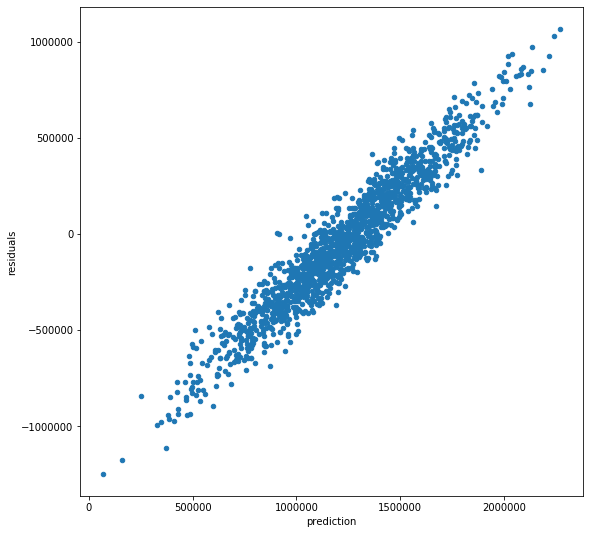

In [146]:
xtestNew = xtest 
xtestNew["prediction"] = [a[0] for a in ypred]
xtestNew["residuals"] = list(residuals[0])

xtestNew.plot(kind="scatter",
           x="prediction",
           y="residuals",
           figsize=(9,9))

((array([-3.31270533, -3.05604344, -2.91334469, ...,  2.91334469,
          3.05604344,  3.31270533]),
  array([-1247960.72504295, -1175307.61280295, -1112372.30036295, ...,
           973878.64303705,  1030748.40103705,  1066390.31803705])),
 (349633.5278934585, -41398.51215916564, 0.9997170926810294))

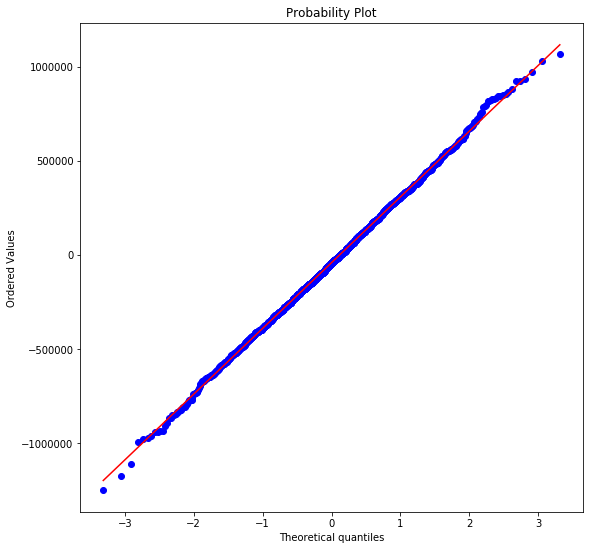

In [148]:
import scipy.stats as stats
plt.figure(figsize=(9,9))

stats.probplot(list(residuals[0]), dist="norm", plot=plt)